In [1]:
%matplotlib inline
from __future__ import division
from matplotlib import pyplot as plt ; import numpy as np ; import pandas as pd

On lit la base de donnée téléchargée [ici](http://www.data.gouv.fr/fr/datasets/transparence-sante-1/)

In [2]:
avantages = pd.read_csv("/Users/adrienpacifico/Downloads/exports-etalab/declaration_avantage_2016_08_22_19_24.csv", sep = ";")

/usr/local/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (12,13,14,22,26,27,28,29,30,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
avantages["nom_prenom"] = avantages.benef_nom + " "+ avantages.benef_prenom #Pour se simplifier la vie

In [4]:
nacass = avantages[avantages.nom_prenom == "NACASS HERVE"] # Mon médecin référent !
date_min = pd.to_datetime(nacass.avant_date_signature, dayfirst=True).min();date_max=  pd.to_datetime(nacass.avant_date_signature, dayfirst=True).max() #pour avoir les dates sur lesquelles il a eu les avantages !
print "Mon médecin référent à touché " + str(nacass.avant_montant_ttc.sum()) + " \xe2\x82\xac" + " d'avantages en nature entre mars 2012 et juillet 2016 ! "

Mon médecin référent à touché 11195 € d'avantages en nature entre mars 2012 et juillet 2016 ! 


In [5]:
datetime = pd.to_datetime(avantages.avant_date_signature, dayfirst=True)

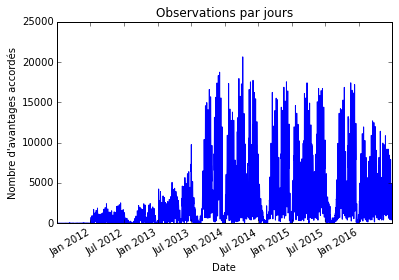

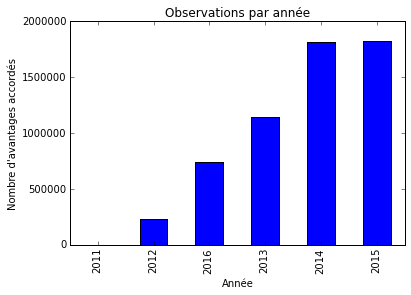

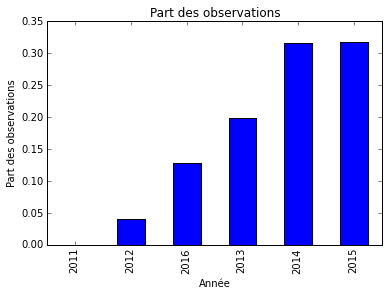

In [6]:
plt.figure()
datetime.value_counts().plot();plt.xlabel(u"Date"); plt.ylabel(u"Nombre d'avantages accordés"); plt.title(u"Observations par jours")
plt.figure()
avantages.avant_date_signature.str[6:].value_counts(ascending=True).plot(kind='bar')
plt.xlabel(u"Année"); plt.ylabel(u"Nombre d'avantages accordés"); plt.title(u"Observations par année")

plt.figure()
(avantages.avant_date_signature.str[6:].value_counts(ascending=True)/len(avantages)).plot(kind='bar')
plt.xlabel(u"Année"); plt.ylabel(u"Part des observations"); plt.title(u"Part des observations")

En gros 60% des observations sont en 2014 et 2015

In [7]:
#On groupe chaque identifiant en sommant le montant ttc des avantages
avantages_grouped = avantages.groupby(by="benef_identifiant_valeur").sum().sort_index(by="avant_montant_ttc", ascending = False)

In [8]:
#Magie ! (probablement mal codé)
avantages_grouped = avantages_grouped.reset_index()
avantages_unique = avantages.drop_duplicates("benef_identifiant_valeur")
classement_noms = pd.merge(avantages_grouped, avantages_unique, on = "benef_identifiant_valeur")
classement_noms = classement_noms.dropna(subset = ["nom_prenom"])#[["nom_prenom","avant_montant_ttc_x"]]
classement_noms.rename(columns={ "avant_montant_ttc_x": "montant des avantages" , "nom_prenom" : u"nom prénom"}, inplace=True)
classement_noms = classement_noms.reset_index()

# Les 100 médecins qui ont le plus eu d'avantages en montant !
(Sur les 376 000 ayant eu des avantages)

In [9]:
#Cleaning
classement_noms.drop(classement_noms.index[[0,1,2,3,4,5,6,7,8,11,12,18,59,95]], inplace=True)
classement_noms = classement_noms.reset_index(drop=True)
pd.options.display.max_rows = 101
classement_noms[[u"nom prénom","montant des avantages","benef_identifiant_valeur"]].head(100) #Les 100 médecins qui ont le plus eu d'avantages en montant 
# Des problèmes de nettoyage de base jusqu'au 12 ème, avec 59 et 95 ème

,nom prénom,montant des avantages,benef_identifiant_valeur
0,HANNA Khalil,309778,10000266576
1,PINGET MICHEL,189264,10003814919
2,CRIBIER ALAIN,151214,10003773198
3,LABORDE FRANCOIS,138128,10000256999
4,LITZLER PIERRE-YVES,131304,10001950947
5,DEFAYE PASCAL,123387,10003870259
6,LECLERCQ CHRISTOPHE,120915,10002645942
7,UDOZEN CHARLY,110865,10000000001
8,PIEROT LAURENT,107955,10004009055
9,FLIPO RENE MARC,105673,10003797221


# Distribution

[ 0.42403741  0.11670991  0.06263624] [ 0.42403741  0.54074732  0.60338356] [  10.      72.836  135.672  198.508]


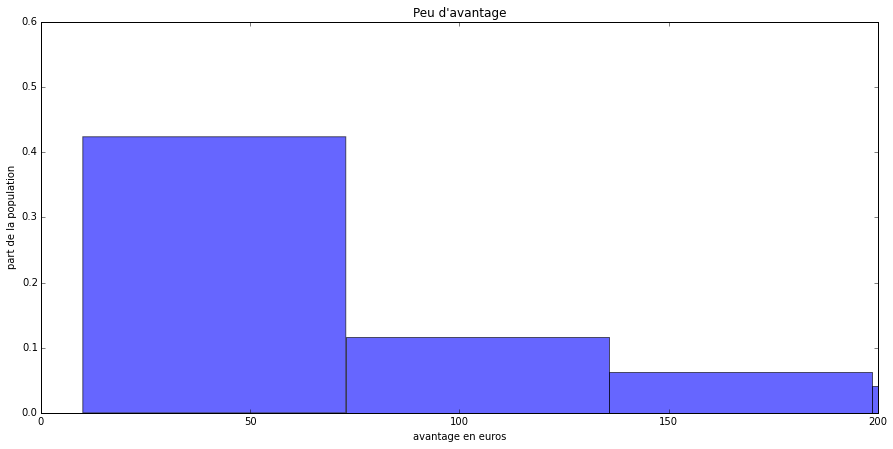

In [10]:

outliers_removed = classement_noms[classement_noms["montant des avantages"] <63071] #vire les 100 premiers
plt.figure(figsize = (15,7))
weights = np.ones_like(outliers_removed["montant des avantages"].values)/len(outliers_removed["montant des avantages"].values)
n, bins, patch = plt.hist(outliers_removed["montant des avantages"].values, weights = weights, bins = 1000, alpha = 0.6)
plt.xlim(0,200); plt.ylim(0,0.6); plt.xlabel("avantage en euros"); plt.ylabel("part de la population"); plt.title("Peu d'avantage")
print n[:3], n[:3].cumsum(), bins[:4]

54% des médecins, pharmaciens, etc ont eu moins de 135 euros d'avantages sur la période. 60% moins de 200 euros.

[ 0.0405187   0.02984273  0.02267846  0.01802633  0.01497719  0.01307115
  0.01125017  0.01023202  0.00908361  0.00832864  0.00793254  0.00703402
  0.00687983] [ 0.0405187   0.07036143  0.09303989  0.11106621  0.12604341  0.13911455
  0.15036473  0.16059675  0.16968036  0.178009    0.18594154  0.19297555
  0.19985539] [  198.508   261.344   324.18    387.016   449.852   512.688   575.524
   638.36    701.196   764.032   826.868   889.704   952.54   1015.376]


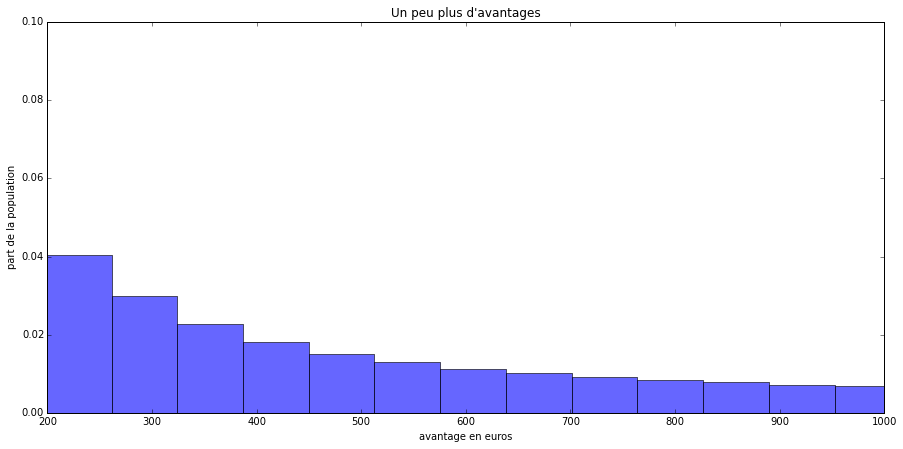

In [11]:
import numpy as np
plt.figure(figsize = (15,7))
weights = np.ones_like(outliers_removed["montant des avantages"].values)/len(outliers_removed["montant des avantages"].values)
n, bins, patch = plt.hist(outliers_removed["montant des avantages"].values, weights = weights, bins = 1000, alpha = 0.6)
plt.xlim(200,1000); plt.ylim(0,0.1); plt.xlabel("avantage en euros"); plt.ylabel("part de la population"); plt.title("Un peu plus d'avantages")
print n[3:13+3],n[3:13+3].cumsum(), bins[3:14+3]

20% en ont pour un montant entre 200 et 1000 euros. Les 20% restants de la base ont donc touché plus de 1000 euros.

[ 0.03905926  0.02467222  0.01816988  0.01433121  0.01094446  0.0089693
  0.00718288  0.00616207  0.00520772  0.00444743  0.00373499  0.0032432
  0.00266899  0.00255468  0.00202301  0.00196719  0.00171464  0.00143286
  0.00135045  0.00115904  0.00104739  0.00097296  0.0009065   0.00079485
  0.00073902  0.00067788  0.00061674  0.0005556   0.00048648  0.00045192] [ 0.0009065   0.00170135] [   638.36   1266.72   1895.08   2523.44   3151.8    3780.16   4408.52
   5036.88   5665.24   6293.6    6921.96   7550.32   8178.68   8807.04
   9435.4   10063.76  10692.12  11320.48  11948.84  12577.2   13205.56
  13833.92  14462.28  15090.64  15719.    16347.36  16975.72  17604.08
  18232.44  18860.8   19489.16]


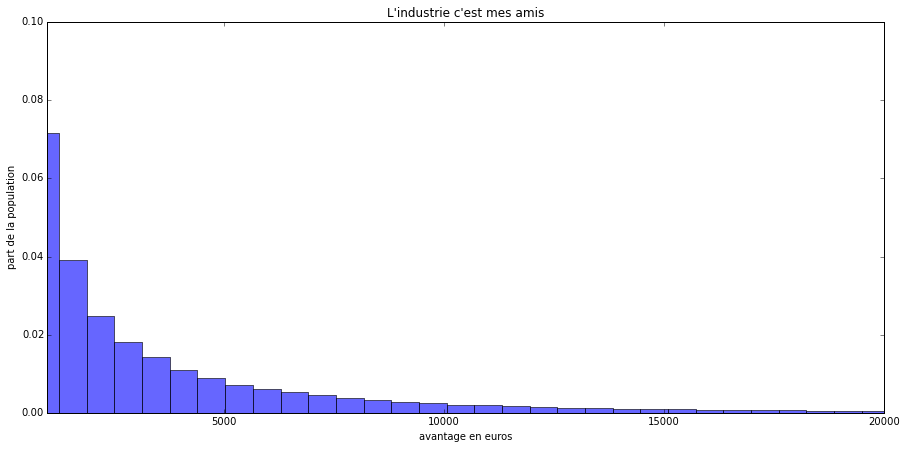

In [12]:
import numpy as np
plt.figure(figsize = (15,7))
weights = np.ones_like(outliers_removed["montant des avantages"].values)/len(outliers_removed["montant des avantages"].values)
n, bins, patch = plt.hist(outliers_removed["montant des avantages"].values, weights = weights, bins = 100, alpha = 0.6)
#plt.xticks(np.arange(1000, 20000, 6000))
plt.xlim(1000,20000); plt.ylim(0,0.1); plt.xlabel("avantage en euros"); plt.ylabel("part de la population"); plt.title("L'industrie c'est mes amis")

print n[2:32],n[24:13+13].cumsum(), bins[1:32]

[ 0.00882043  0.00354359  0.00164818  0.00095967  0.00045724  0.00029242
  0.00020469  0.00014355] [] [  6293.6  12577.2  18860.8  25144.4  31428.   37711.6  43995.2  50278.8
  56562.4  62846. ]


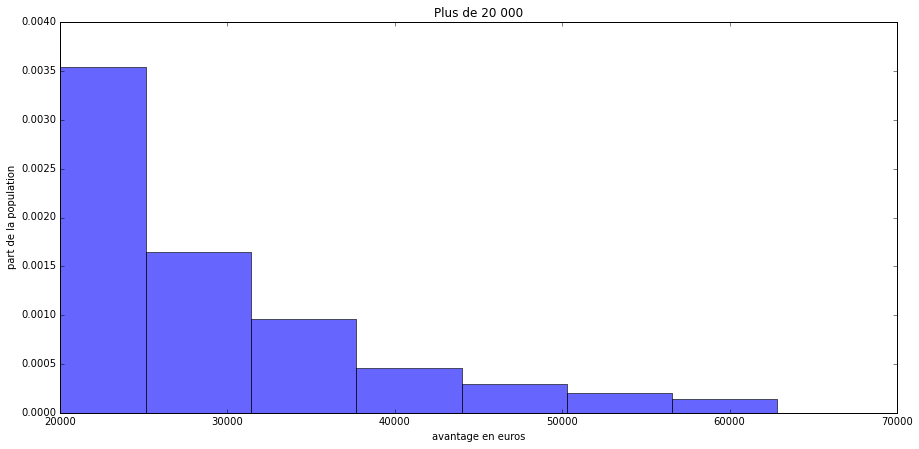

In [13]:
import numpy as np
plt.figure(figsize = (15,7))
weights = np.ones_like(outliers_removed["montant des avantages"].values)/len(outliers_removed["montant des avantages"].values)
n, bins, patch = plt.hist(outliers_removed["montant des avantages"].values, weights = weights, bins = 10, alpha = 0.6)
plt.xlim(20000); plt.ylim(0,0.004); plt.xlabel("avantage en euros"); plt.ylabel("part de la population"); plt.title("Plus de 20 000")
print n[2:32],n[24:13+13].cumsum(), bins[1:32]

# En valeur absolue

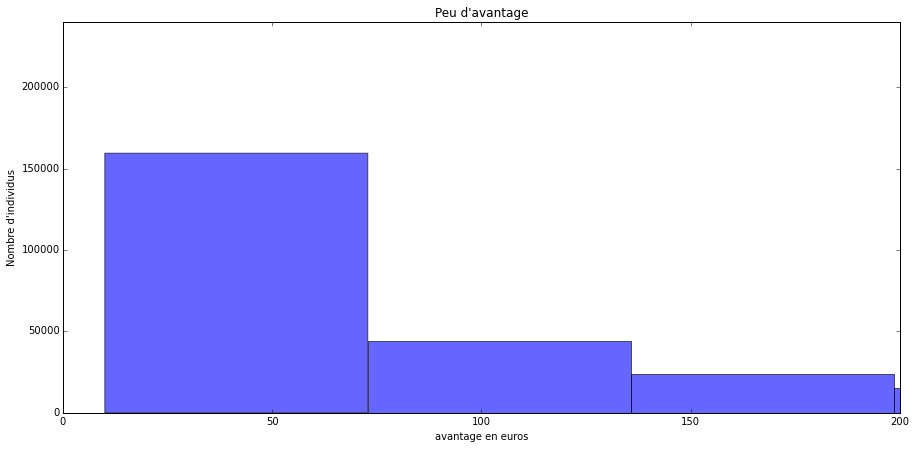

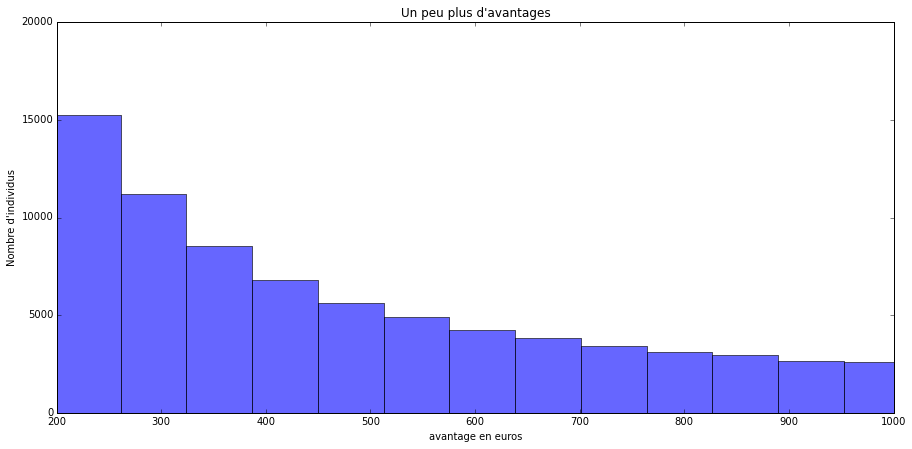

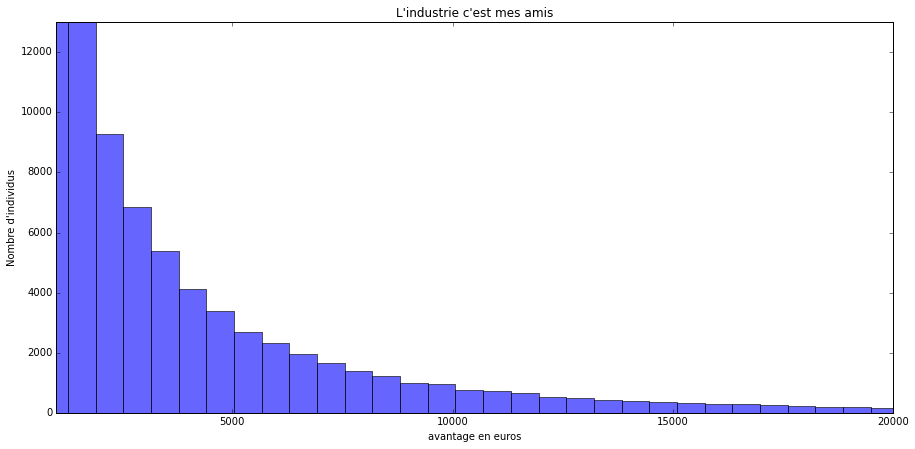

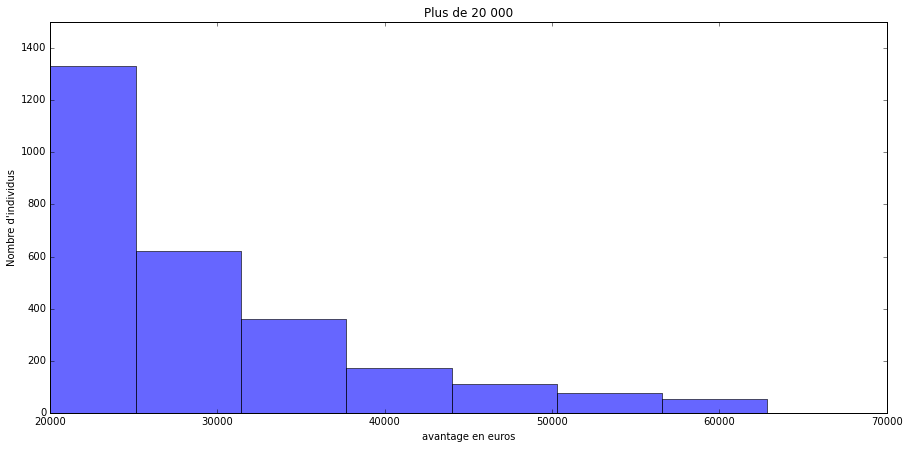

In [14]:
import numpy as np; import matplotlib.pyplot as plt
outliers_removed = classement_noms[classement_noms["montant des avantages"] <63071] #vire les 100 premiers
plt.figure(figsize = (15,7))
n, bins, patch = plt.hist(outliers_removed["montant des avantages"].values, bins = 1000, alpha = 0.6)
plt.xlim(0,200); plt.ylim(0,1.6*10**5*1.5); plt.xlabel("avantage en euros"); plt.ylabel("Nombre d'individus"); plt.title("Peu d'avantage")
plt.figure(figsize = (15,7))
n, bins, patch = plt.hist(outliers_removed["montant des avantages"].values, bins = 1000, alpha = 0.6)
plt.xlim(200,1000); plt.ylim(0,20000); plt.xlabel("avantage en euros"); plt.ylabel("Nombre d'individus"); plt.title("Un peu plus d'avantages")

plt.figure(figsize = (15,7))
n, bins, patch = plt.hist(outliers_removed["montant des avantages"].values, bins = 100, alpha = 0.6)
#plt.xticks(np.arange(1000, 20000, 6000))
plt.xlim(1000,20000); plt.ylim(0,13000); plt.xlabel("avantage en euros"); plt.ylabel("Nombre d'individus"); plt.title("L'industrie c'est mes amis")
plt.figure(figsize = (15,7))
n, bins, patch = plt.hist(outliers_removed["montant des avantages"].values,  bins = 10, alpha = 0.6)
plt.xlim(20000); plt.ylim(0,1500); plt.xlabel("avantage en euros"); plt.ylabel("Nombre d'individus"); plt.title("Plus de 20 000")
